In [1]:
import pandas as pd
import boto3
import botocore
import matplotlib.pyplot as plt
import os
import shutil
import datetime

In [2]:
def load_images(size=100,
                img_csv = "new_target_images_large.csv",
                BUCKET_NAME = "open-images-dataset",
                split = "train",
                download_folder = "images"
                ):
    bucket = boto3.resource(
        's3', 
        config=botocore.config.Config(
            signature_version=botocore.UNSIGNED)).Bucket(BUCKET_NAME)
    
    df = pd.read_csv(img_csv)
    count = 0
    while count!=size:
        if download_one_image(bucket, 
                              split, 
                              df.iloc[0,0], 
                              download_folder):
            count += 1
        df = df.loc[1:].reset_index(drop=True)
    df.to_csv(img_csv, index=False)
            
def download_one_image(bucket, split, image_id, download_folder):
    try:
        bucket.download_file(f'{split}/{image_id}.jpg',
                             os.path.join(download_folder, f'{image_id}.jpg'))
        return True
    except botocore.exceptions.ClientError as exception:
        return False
    
def generate_labels(label_path):
    # Read in dataframe
    labels = pd.read_csv(label_path) 

    # Turn labels into dictionary
    labels = {i:{'label':row['label'], 
                 'display_name':row['display_name']} for i, row in labels.iterrows()} 
    
    # Add extra labels
    labels[max(labels.keys())+1] = {'label':'No Classification', 'display_name':'No Classification'}
    labels[max(labels.keys())+1] = {'label':'Quit', 'display_name':'Quit'}
    
    return labels

def classify(img_path, output_path, labels):
    # Collect output in lists
    image_id, label, rationale = [], [], []
    
    while True:
        # Load images into the folder if the folder is empty
        if not os.listdir(img_path):
            load_images()
        
        # Get first image
        filename = f"{img_path}/{os.listdir(img_path)[0]}"
        if 'checkpoint' in filename:
            shutil.rmtree(filename)
            continue
        
        # Display image
        img = plt.imread(filename)    
        imgplot = plt.imshow(img)
        plt.show()
        
        # Get input for classification ID
        print([f"[{i}]: {labels[i]['display_name']}" for i in labels.keys()])
        print("Enter Selection ID:")
        answer_id = ""
        while type(answer_id)!=int and (answer_id not in labels.keys()):
            try:
                answer_id = int(input())
            except:
                print("Must input an integer ID!")
        
        # Process input
        if labels[answer_id]['label']=='Quit':
            break
        if labels[answer_id]['label']!='No Classification':
            # Get input for rationale to be added to the output
            print("Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer")
            desc = input()
            
            # Redo picture if the wrong answer was entered
            if desc=='resubmit':
                continue
            
            # Add correct labels and append to lists
            image_id.append(os.listdir(img_path)[0].replace(".jpg",""))
            label.append(labels[answer_id]['label'])
            desc = desc if desc else f"I think there is a {labels[answer_id]['label']} in the image."
            rationale.append(desc)
            
        # Remove the image
        os.remove(f"{img_path}/{os.listdir(img_path)[0]}")
        
    # Output a dataframe in the output_path folder with the timestamp as the csv filename
    result = pd.DataFrame({'image_id':image_id, 'label':label, 'rationale':rationale})
    result.to_csv(f"{output_path}/submission_{str(datetime.datetime.now())}.csv", index=False)
   


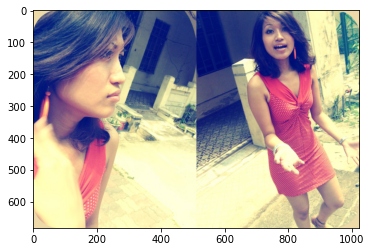

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 23


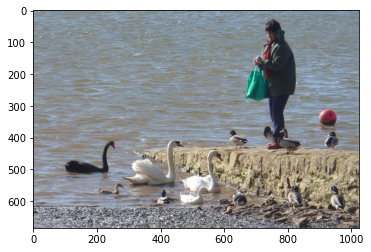

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


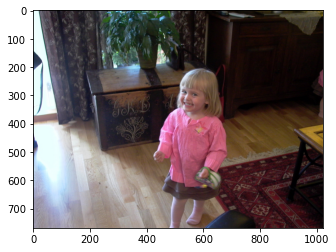

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


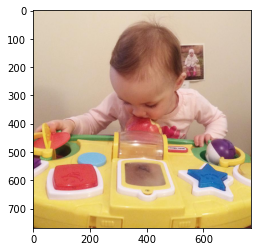

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6
 


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


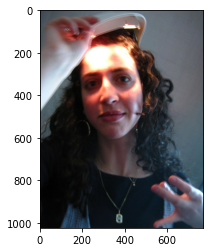

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 1


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


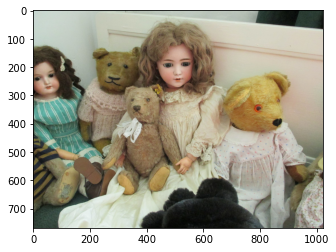

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 23


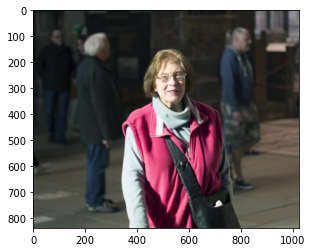

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 23


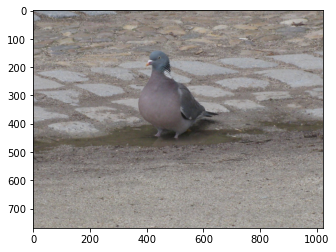

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


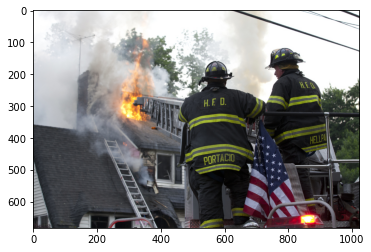

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 11


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


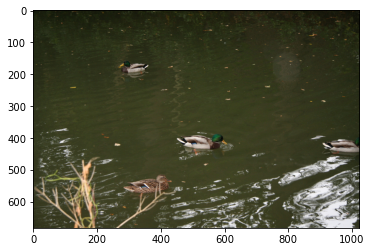

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


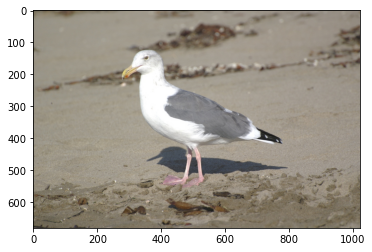

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


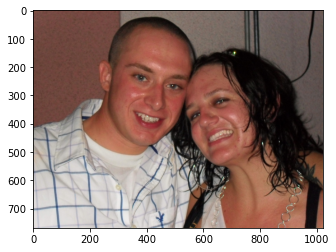

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


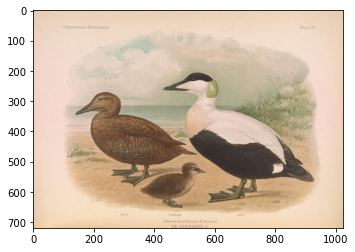

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


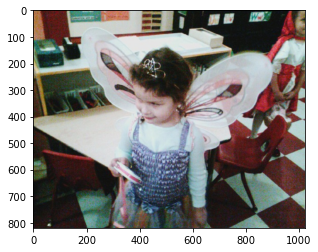

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


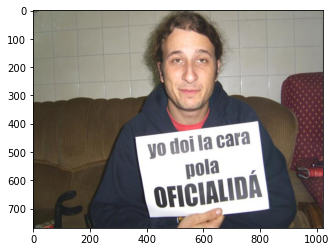

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 23


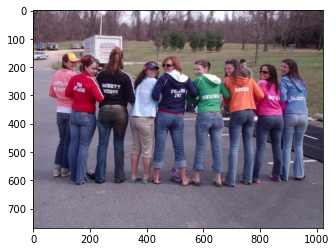

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


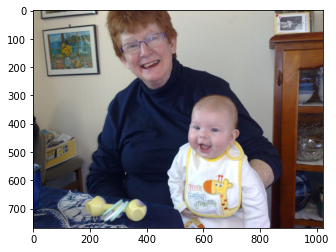

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


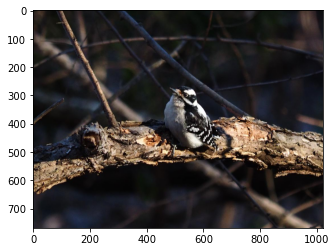

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


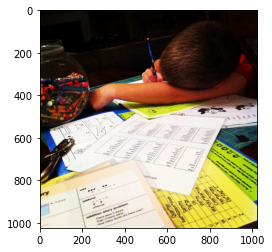

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


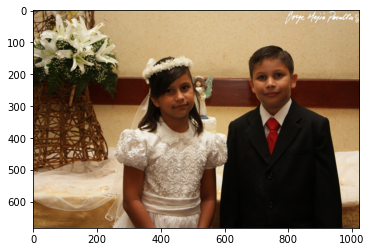

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


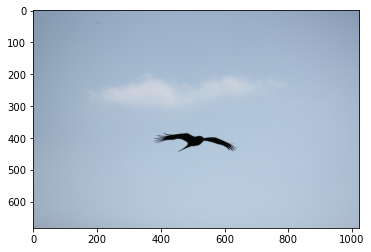

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


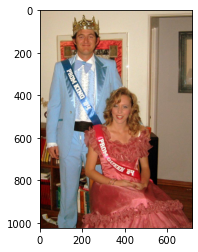

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


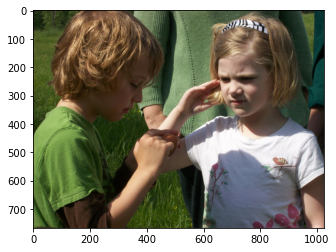

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


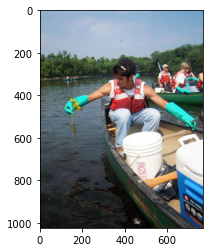

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 20


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


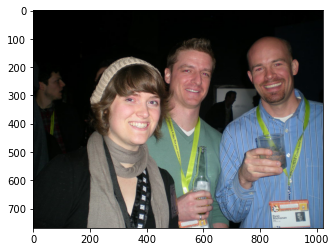

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


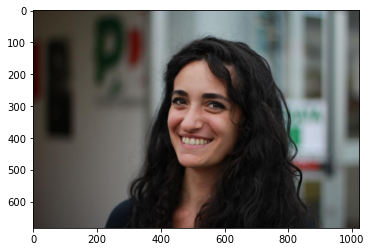

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


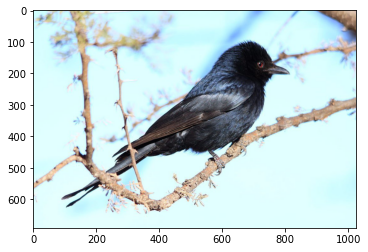

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 21


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


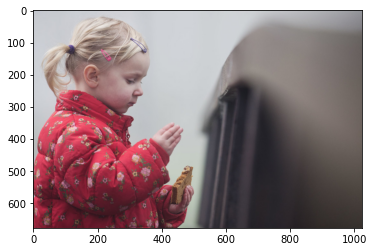

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


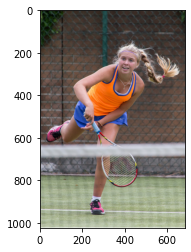

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 15


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


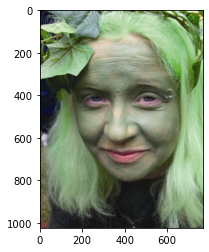

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


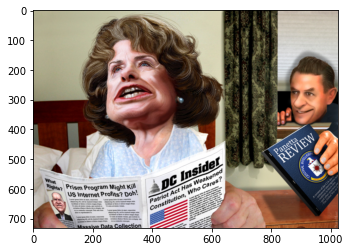

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 23


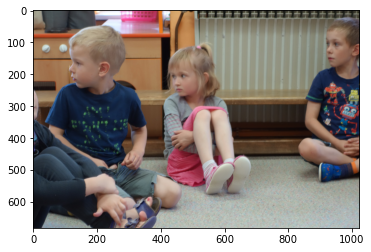

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 6


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


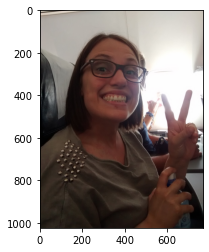

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


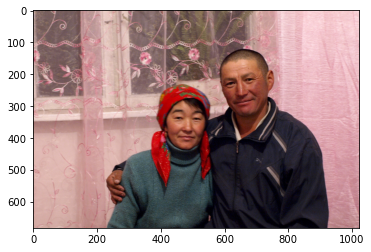

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


 2


Enter Rationale, leave blank for standard response, or write 'resubmit' if you would like to reenter your answer


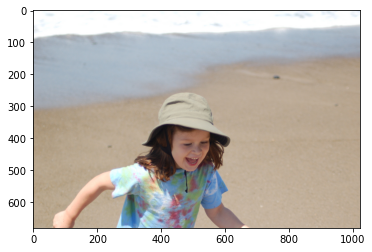

['[0]: Lipstick', '[1]: Selfie', '[2]: Smile', '[3]: Thanksgiving', '[4]: Funeral', '[5]: Graduation', '[6]: Child', '[7]: Physician', '[8]: Nurse', '[9]: Teacher', '[10]: Bus Driver', '[11]: Firefighter', '[12]: Chef', '[13]: Construction Worker', '[14]: Coach', '[15]: Athlete', '[16]: American football', '[17]: Muffin', '[18]: Croissant', '[19]: Pizza', '[20]: Canoe', '[21]: Bird', '[22]: Chopsticks', '[23]: No Classification', '[24]: Quit']
Enter Selection ID:


In [ ]:
classify("images", "submissions", labels=generate_labels("target_labels.csv"))